# Homework 5
$Eric Kuhn, Luke Marcoon, Machlan Pettersen$

# Problem 1

This follows PB 1 of HT-ablation-bl

 The upstream water flow velocity is $1 \mathrm{m/s}$ and its upstream temperature is $99^\circ\mathrm{C}$. Plot the evolution of the initial ablation velocity in $\text{mm/s}$ and/or give its values for $x=0.01,0.1,0.2,0.5,1.0\mathrm{m}$. Discuss which fluid is more likley to achieve the formation of the deepest erosion-driven roughness.

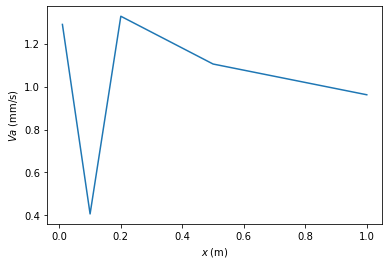

In [1]:
from Libraries import thermodynamics as thermo
from Libraries import HT_external_convection as extconv
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

# Upstream water properties:
U_infty = 1. #m/s
T_infty = 99. #C

#Melting surface 
T_melt = 50. #C

#Bottom temperature
T_cool = 20. #C

#Wax properties
k_wax = 0.25 #W/m.K
rho_wax = 900. #kg/m^3
h_L_wax = 200.0e3 #J/kg
t_wax = 0.05 #m
L_plate = 1. #m

# conduction heat flux in the wax
qpp_cond = k_wax*(T_melt - T_cool)/t_wax

def Va(qpp, Ts):
    global T_melt, rho_wax, h_L_wax, qpp_cond
    if (Ts >= T_melt):
        Va = np.maximum.reduce([(qpp - qpp_cond)/(rho_wax*h_L_wax), 0.])
    else:
        Va = 0.
    return Va

# convection heat flux
T_f = (T_melt + T_infty)/2.
waterprop = thermo.Fluid('water',thermo.C2K(T_f))
waterconv = extconv.FlatPlate('mixed','isothermal',U_infty,waterprop.nu,waterprop.alpha,1.)

npts = 5
x = np.array([0.01, 0.1, 0.2, 0.5, 1.0])
Va_x = np.zeros_like(x)
for i in range(npts):
    xlocal = x[i]
    waterconv.local(xlocal)
    hx = waterconv.Nu_x*waterprop.k/xlocal
    qpp_x = hx*(T_infty - T_melt)
    Va_x[i] = Va(qpp_x,T_melt)

# plt.figure(figsize(3,2),dpi=150)
plt.plot(x,Va_x*1e3)
plt.xlabel("$x\;(\mathrm{m})$")
plt.ylabel("$Va\;(\mathrm{mm}/\mathrm{s})$")
plt.show()

According to the plots, the water would have a greater effect on the erosion of the ablative wax material. The velocity is greatly stunted at x = 0.2 m owing to a higher shear at the interface between the wax and the flow.

# Problem 2
<img src='figures_Tube_Banks/probun_07_34.jpg' alt="my awesome sketch" width=100% >
An air duct heater consists of an aligned array of electrical heating elements in which the longitudinal and transverse pitches are $S_L=S_T= 24\text{ mm}$. There are 3 rows of elements in the ﬂow direction ($N_L=3$) and 4 elements per row ($N_T=4$). Atmospheric air with an upstream velocity of $12\text{ m/s}$ and a temperature of $25^\circ\text{C}$ moves in cross ﬂow over the elements, which have a diameter of $12\text{ mm}$, a length of $250\text{ mm}$, and are maintained at a surface temperature of $350^\circ\text{C}$.
<ol>
<li>
Determine the total heat transfer to the air and the temperature of the air leaving the duct heater.
</li>
<li>
Determine the pressure drop across the element bank and the fan power requirement.
</li>
<li>
Compare the average convection coefﬁcient obtained in your analysis with the value for an isolated (single) element. Explain the difference between the results.
</li>
<li>
What effect would increasing the longitudinal and transverse pitches to 30 mm have on the exit temperature of the air, the total heat rate, and the pressure drop?
</li>
</ol>

In [2]:
#Bank of Tube Properties
T_i = 25 #C
T_o = 75 #C
T_s = 350 #C
V_i = 12 #m/s
L = 250e-3 #mm
D = 12e-3 #mm
N_L = 3
N_T = 4
S_T = S_L = 24e-3 #m

bank = extconv.BankofTubes('aligned','air',T_i,T_s,T_o,"C",V_i,D,S_L,S_T,N_L)

Part 1

In [3]:
bank.heat_rate(N_T,N_L,L=1)
print("The total heat transfered to the air is q=%.0f W" %(bank.q))

bank.temperature_outlet_tube_banks(N_T,N_L)
print("With N_L= %.0f, T_o= %.2f" %(bank.N_L,bank.T_o))

The total heat transfered to the air is q=30599 W
With N_L= 3, T_o= 48.28


Part 2

In [4]:
print("With N_L=%.0f, T_o=%.2f" %(bank.N_L,bank.T_o))
print("Re=%.0f, P_L = %.2f" %(bank.Re,bank.S_T/bank.D))
bank.pressure_drop(N_L,0.2,1)
print("Pressure drop is %.2f Pa" %(bank.Delta_p))

fanPower = bank.Delta_p*V_i
print("The power required by the fan is %.1f W" %fanPower)

With N_L=3, T_o=48.28
Re=17379, P_L = 2.00
Pressure drop is 204.85 Pa
The power required by the fan is 2458.3 W


Part 3

In [5]:
h = bank.q/(bank.T_o-T_i)
print("The average convection coefficient for this bank of tubes is %.2f" %h)

N_T = N_L = 1
bank2 = extconv.BankofTubes('aligned','air',T_i,T_s,T_o,"C",V_i,D,S_L,S_T,N_L)
bank2.heat_rate(N_T,N_L,L=1)
bank2.temperature_outlet_tube_banks(N_T,N_L)

h2 = (bank2.q)/(bank2.T_o-T_i)
print("The convection coefficient for a single element is %.2f" %h2)

The average convection coefficient for this bank of tubes is 1314.18
The convection coefficient for a single element is 319.83


Part 4

In [6]:
T_i = 25 #C
T_o = 75 #C
T_s = 350 #C
V_i = 12 #m/s
L = 250e-3 #mm
D = 12e-3 #mm
N_L = 3
N_T = 4
S_T = S_L = 30e-3 #m

bank3 = extconv.BankofTubes('aligned','air',T_i,T_s,T_o,"C",V_i,D,S_L,S_T,N_L)
bank3.heat_rate(N_T,N_L,L)
print("The total heat transfered to the air is q = %.0f W" %(bank3.q))
bank3.temperature_outlet_tube_banks(N_T,N_L)
print("The outlet temperature is %.0f C" %(bank3.T_o))
print("Re=%.0f, P_L = %.2f" %(bank3.Re,bank3.S_T/bank3.D))
bank3.pressure_drop(N_L,0.19,1)
print("Pressure drop is %.2f Pa" %(bank3.Delta_p))

The total heat transfered to the air is q = 6820 W
The outlet temperature is 42 C
Re=14483, P_L = 2.50
Pressure drop is 135.15 Pa


# Problem 3
An aluminum transmission line with a diameter of
20 mm has an electrical resistance of $R'_\text{elec}=2.636\times10^{-4}\Omega/\text{m}$
and carries a current of 700 A. The line is
subjected to frequent and severe cross winds, increasing the probability of contact between adjacent lines,
thereby causing sparks and creating a potential ﬁre hazard for nearby vegetation. The remedy is to insulate the
line, but with the adverse effect of increasing the conductor operating temperature.
<ol>
<li> Calculate the conductor temperature when the air temperature is $20^\circ\text{C}$ and the cross flow wind velocity is $10\text{m/s}$</li>
<li> Calculate the conductor temperature for the same
conditions, but with a $2\text{mm}$-thick insulation having
a thermal conductivity of $0.15\text{W/(m.K)}$.</li>

In [7]:
R = 2.636e-4 #ohm/m
D = 20e-3 #mm
I = 700 #A
T_i = 20 #C
T_o = 55 #C
V_i = 10 #m/s

q = (I*I)*R
print("The steady state heat rate from the transmission line is %.2f W/m" %q)

#From properties of air
airprop = thermo.Fluid("air",300)
Re = (V_i*D)/airprop.nu
print("The Reynolds number is %.0f" %Re)

cable = extconv.CircularCylinder('Churchill-Bernstein',Re,airprop.Pr)
print("The Nusselt number is %.2f" %cable.Nu)
#?extconv.CircularCylinder
h = (cable.Nu*airprop.k)/D

T_s = (q/(h*np.pi*D)) + T_i
print("The cable conductor surface temperature is %.0f C" %T_s)

The steady state heat rate from the transmission line is 129.16 W/m
The Reynolds number is 12701
The Nusselt number is 61.29
The cable conductor surface temperature is 46 C


In [8]:
D_o = 22e-3 #mm
k_ins = 15e-2 #W/mK

Re2 = (V_i*D_o)/airprop.nu
print("The Reynolds number is %.0f" %Re2)

cable2 = extconv.CircularCylinder('Churchill-Bernstein',Re2,airprop.Pr)
print("The Nusselt number is %.2f" %cable2.Nu)

h2 = (cable2.Nu*airprop.k)/D
print("The convective heat transfer coefficient is %.2f W/m2K" %h2)

R_tot = (np.log(D_o/D)/(2*np.pi*k_ins)) + 1/(h2*np.pi*D_o) 
print("The total thermal resistance of the cable and insulation is %.3f K/W" %R_tot)

T_c = q*R_tot
print("The conductor temperature is %.1f C" %(T_c))

The Reynolds number is 13971
The Nusselt number is 64.66
The convective heat transfer coefficient is 84.64 W/m2K
The total thermal resistance of the cable and insulation is 0.272 K/W
The conductor temperature is 35.1 C


<li>3. Calculate and plot the temperatures of the bare and
insulated conductors for wind velocities in the
range from $2$ to $20\text{m/s}$. Comment on features of
the curves and the effect of the wind velocity on the
conductor temperatures.</li>
</ol>

[80.82478551 52.51424489 44.28643437 39.97152212 37.21332728]
[65.6846504  41.11730542 33.98213272 30.24233828 27.85306869]


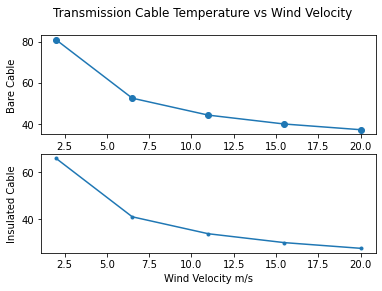

In [9]:
npts = 5
x = np.linspace(2,20,npts)
Tb_x = np.zeros_like(x)
for i in range(npts):
    xlocal = x[i]
    Re = (xlocal*D)/airprop.nu
    cable = extconv.CircularCylinder('Churchill-Bernstein',Re,airprop.Pr)
    h = (cable.Nu*airprop.k)/D
    Tb_x[i] = (q/(h*np.pi*D)) + T_i
print(Tb_x)

npts = 5
x = np.linspace(2,20,npts)
Ti_x = np.zeros_like(x)
for i in range(npts):
    xlocal = x[i]
    Re2 = (xlocal*D_o)/airprop.nu
    cable2 = extconv.CircularCylinder('Churchill-Bernstein',Re2,airprop.Pr)
    h2 = (cable2.Nu*airprop.k)/D
    R_tot = (np.log(D_o/D)/(2*np.pi*k_ins)) + 1/(h2*np.pi*D_o)
    Ti_x[i] = q*R_tot
    
print(Ti_x)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Transmission Cable Temperature vs Wind Velocity')

ax1.plot(x, Tb_x, 'o-')
ax1.set_ylabel('Bare Cable')

ax2.plot(x, Ti_x, '.-')
ax2.set_xlabel('Wind Velocity m/s')
ax2.set_ylabel('Insulated Cable')

plt.show()

The effect of wind velocity on the bare cable surface temperature is much greater than the insulated cable. This effect is due to the insulating sheath preventing direct convective heat transfer from the electrical conductor.

# Problem 4

The top surface of a heated compartment consists of very smooth (A) and highly roughened (B) portions, and the surface is placed in an atmospheric airstream. 
In the interest of minimizing total convection heat transfer from the surface, which orientation, (1) or (2),
is preferred? If $T_s=100^\circ\text{C}$,  $T_\infty= 20^\circ\text{C}$, and $u_\infty=20\text{ m/s}$, what is the convection heat transfer from the entire surface for this orientation?

Calculate the value of the average heat transfer coefﬁcient when the entire plate is rotated $90^\circ$ so that half of the leading edge consists of a very smooth portion (A) and the other half consists of a highly roughened portion (B).

In [10]:
T_s = 100. #C
T_infty = 20. #C
U_infty = 20 #m/s
L_A = 5e-1 #m
L_B = 5e-1 #m
A = 25e-2 #m

?extconv.FlatPlate
T_f = (T_s-T_infty)/2
airprop = thermo.Fluid("air",thermo.C2K(T_f))

plateA = extconv.FlatPlate('laminar','isothermal',U_infty,airprop.nu,airprop.alpha,L_A,0.0,5e5)
plateA.average(L_A)
h_A = (plateA.Nu_ave*airprop.k)/(L_A)

plateB = extconv.FlatPlate('turbulent','isothermal',U_infty,airprop.nu,airprop.alpha,0.0,5e5)
plateB.average(L_B)
h_B = (plateB.Nu_ave*airprop.k)/(L_B)

print(h_A)
print(h_B)

q_tot = h_A*A*(T_s-T_infty) + h_B*A*(T_s-T_infty)

print("The total heat transfer from the entire surface of the A-B orientation is %.2f W" %q_tot)

24.6373478058797
73.91337724739549
The total heat transfer from the entire surface of the A-B orientation is 1971.01 W


Orientation 2 is preferred. When the rough compartment is the leading edge, the formation of the boundary layer causes a greater amount of heat transfer as the turbulence 

In [11]:
h_avg = (h_A+h_B)/2

print("The average convective heat transfer coefficient for the 90 degree orientation is %.2f" %h_avg)

The average convective heat transfer coefficient for the 90 degree orientation is 49.28
